In [1]:
import numpy as np
from numpy import array
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense

Using TensorFlow backend.


In [12]:
# univariate lstm example

# split a univariate sequence into samples
def split_sequence(sequence, n_steps, features_data): #features = other data of the county 
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        seq_x = np.append(seq_x,features_data)
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)


# define input sequence
raw_seq = [10, 20, 30, 40, 50, 60, 70, 80, 90]
features_data = np.array([2,40,3])
features_length = len(features_data)

# choose a number of time steps
n_steps = 3
# split into samples
X, y = split_sequence(raw_seq, n_steps,features_data)
print(X,y)

# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps+features_length, n_features)))  # features_length is length of features_data array 
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=200, verbose=0)

# demonstrate prediction
x_input = array([70, 80, 90, 2, 40, 3])
x_input = x_input.reshape((1, n_steps+features_length, n_features))
yhat = model.predict(x_input, verbose=0)
print(yhat)



[[10 20 30  2 40  3]
 [20 30 40  2 40  3]
 [30 40 50  2 40  3]
 [40 50 60  2 40  3]
 [50 60 70  2 40  3]
 [60 70 80  2 40  3]] [40 50 60 70 80 90]
[[100.49966]]


In [8]:
# Perform prediction 
def single_pred(x_input, n_steps, features_length, n_features):
    x_input = x_input.reshape((1, n_steps+features_length, n_features))
    yhat = model.predict(x_input, verbose=0)
    return yhat

def make_prediction(raw_seq, n_steps, features_data, num_pred):
    features_length = len(features_data)
    yhat_array = np.zeros(num_pred)
    for i in range(num_pred):
        if i == 0:
            x_input = raw_seq[-n_steps:]
            x_input = np.append(x_input,features_data)
            yhat = single_pred(x_input, n_steps, features_length, n_features)
            yhat_array[i] = yhat
        else:
            x_input = np.append(x_input[1:3],yhat) # create feature from previous prediction
            x_input = np.append(x_input,features_data) # insert stationary feature
            yhat = single_pred(x_input, n_steps, features_length, n_features)
            yhat_array[i] = yhat
    return yhat_array

yhat_array = make_prediction(raw_seq, 3, np.array([2,40,3]),5)
print(yhat_array)

# Evaluate the trained model
# score = model.evaluate(x_test, y_test, verbose=0)

[101.4344101  113.49117279 126.44288635 140.77462769 156.34413147]


Text(0, 0.5, 'y')

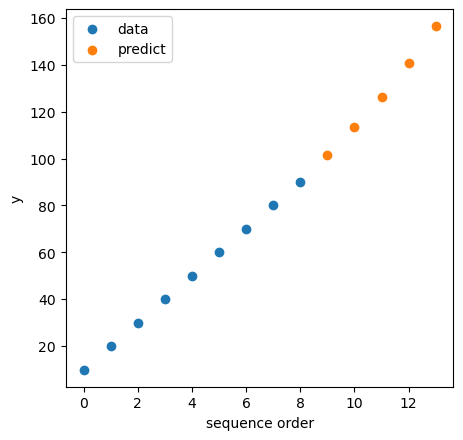

In [13]:
# Plotting
fig, ax = plt.subplots(figsize=(5,5),dpi=100)
ax.scatter(range(len(raw_seq)),raw_seq,label='data')
pred_order = len(raw_seq)+5 #num_pred = 5
ax.scatter(range(len(raw_seq),pred_order),yhat_array,label='predict')
ax.legend()
ax.set_xlabel('sequence order')
ax.set_ylabel('y')

In [6]:
%whos

Variable          Type                          Data/Info
---------------------------------------------------------
Dense             type                          <class 'keras.layers.core.Dense'>
LSTM              type                          <class 'keras.layers.recurrent.LSTM'>
Sequential        type                          <class 'keras.engine.sequential.Sequential'>
X                 ndarray                       6x6x1: 36 elems, type `int32`, 144 bytes
abc               ndarray                       3: 3 elems, type `int32`, 12 bytes
array             builtin_function_or_method    <built-in function array>
ax                AxesSubplot                   AxesSubplot(0.125,0.125;0.775x0.755)
features_data     ndarray                       3: 3 elems, type `int32`, 12 bytes
features_length   int                           3
fig               Figure                        Figure(500x500)
make_prediction   function                      <function make_prediction at 0x00000233C9618620